In [1]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

In [2]:
def state_list():
    fiddy_states = pd.read_html('https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States')
    states = []
    for abbv in (fiddy_states[0]['Name &postal abbreviation[12]']['Name &postal abbreviation[12].1']):
        states.append(abbv)
    return states

In [8]:
def quandl_all_states():
    states = state_list()
    main_df = pd.DataFrame()

    for i in states:
        quandl_state_code = 'FMAC/HPI_' + str(i)
        #print(quandl_state_code)
        df = quandl.get(quandl_state_code, authtoken = "KwWzLLZqSKFv4jBtSYr6")
        df.rename(columns = {'NSA Value': str(i)}, inplace = True)
        df = pd.DataFrame(df[i])
        #df = df.pct_change()
        df[i] = (df[i] - df[i][0])/df[i][0] * 100.0
        #print(df.head())

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df)
    print(main_df.head())
    main_df.to_pickle('United States.pickle')
#quandl_all_states()

def HPI_Benchmark():
    df = quandl.get('FMAC/HPI_USA', authtoken = "KwWzLLZqSKFv4jBtSYr6")
    #print(df.head())
    df.rename(columns = {'NSA Value': 'United States'}, inplace = True)
    
    df['United States'] = (df['United States'] - df['United States'][0]) / df['United States'][0] * 100.0
    #df = df['United States']
    return df['United States']

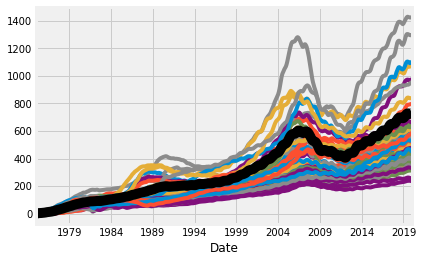

In [19]:
fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

HPI_data = pd.read_pickle('United States.pickle')
benchmark = HPI_Benchmark()
HPI_data.plot(ax=ax1)
benchmark.plot(color='k',ax=ax1, linewidth=10)

plt.legend().remove()
plt.show()

In [20]:
print(HPI_data.corr())
print(HPI_data.corr().describe())

          AL        AK        AZ        AR        CA        CO        CT  \
AL  1.000000  0.958106  0.949244  0.996371  0.951630  0.951705  0.944014   
AK  0.958106  1.000000  0.928798  0.974350  0.936995  0.950062  0.884026   
AZ  0.949244  0.928798  1.000000  0.949045  0.983084  0.938198  0.898111   
AR  0.996371  0.974350  0.949045  1.000000  0.955411  0.962045  0.935527   
CA  0.951630  0.936995  0.983084  0.955411  1.000000  0.952122  0.916113   
CO  0.951705  0.950062  0.938198  0.962045  0.952122  1.000000  0.839576   
CT  0.944014  0.884026  0.898111  0.935527  0.916113  0.839576  1.000000   
DE  0.982839  0.944434  0.946046  0.978037  0.959475  0.910127  0.977240   
FL  0.942520  0.921735  0.995821  0.942506  0.989864  0.933203  0.904330   
GA  0.979347  0.921262  0.963414  0.973400  0.965235  0.963572  0.921268   
HI  0.954437  0.956506  0.941247  0.961088  0.965911  0.943516  0.897220   
ID  0.969604  0.948323  0.970678  0.969673  0.962879  0.974015  0.870073   
IL  0.981408

In [45]:
TX1yr = HPI_data['TX'].rolling(12).std()
print(TX1yr.head())

Date
1975-01-31   NaN
1975-02-28   NaN
1975-03-31   NaN
1975-04-30   NaN
1975-05-31   NaN
Name: TX, dtype: float64
